In [102]:
import os
import pandas as pd
import mne
import matplotlib.pyplot as plt
import numpy as np
# plt.ion()

In [88]:
fig = raw.plot(scalings=dict(eeg=100e-6), start=10, duration=50, show=False)

In [89]:
subject_name = 'sub-007'
ds_path = "/Applications/THESIS/OPENNEURO"
raw_path = f"{ds_path}/{subject_name}/eeg"
prep_path = f"{ds_path}/derivatives/{subject_name}/eeg"

#### Raw

In [90]:
raw = mne.io.read_raw_eeglab(os.path.join(raw_path, f"{subject_name}_task-eyesclosed_eeg.set"))

/var/folders/2r/ng5l8yc97950rj3w9g5mq9h00000gn/T/ipykernel_17474/3519228182.py:1: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = mne.io.read_raw_eeglab(os.path.join(raw_path, f"{subject_name}_task-eyesclosed_eeg.set"))


In [91]:
fig = raw.plot(scalings=dict(eeg=100e-6), start=10, duration=50, show=False)

Effective window size : 4.096 (s)


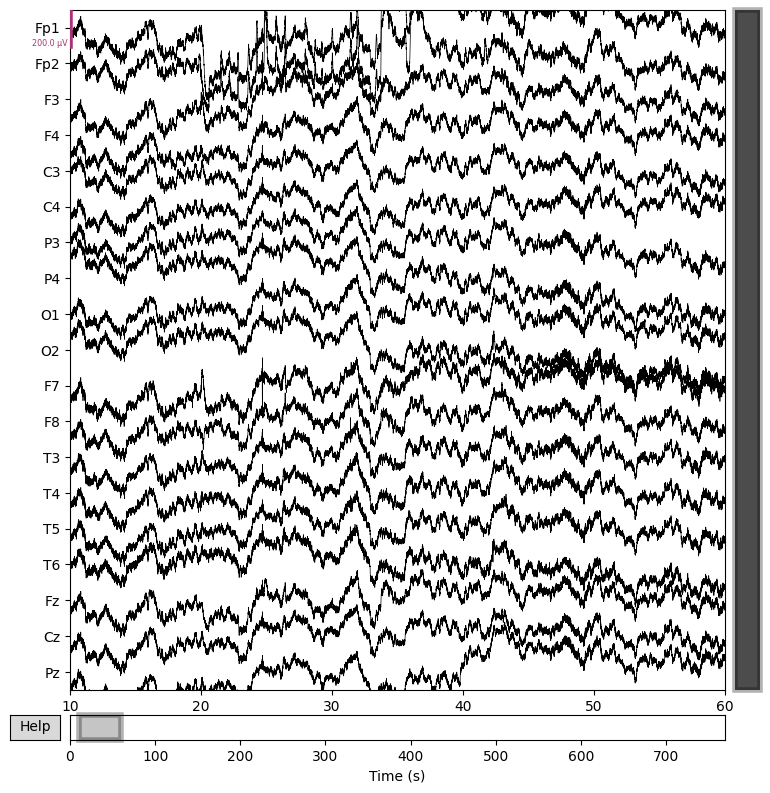

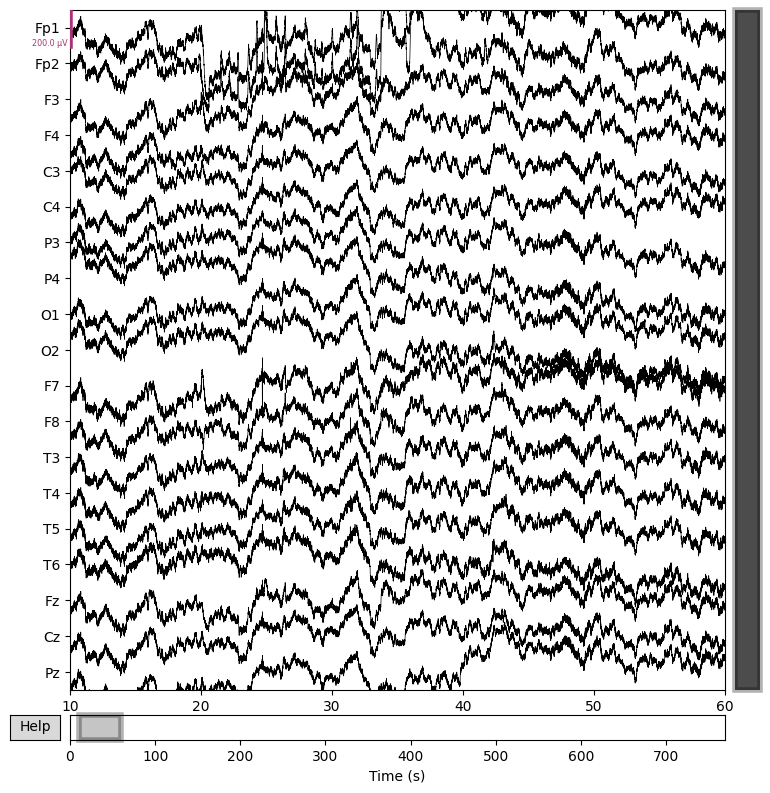

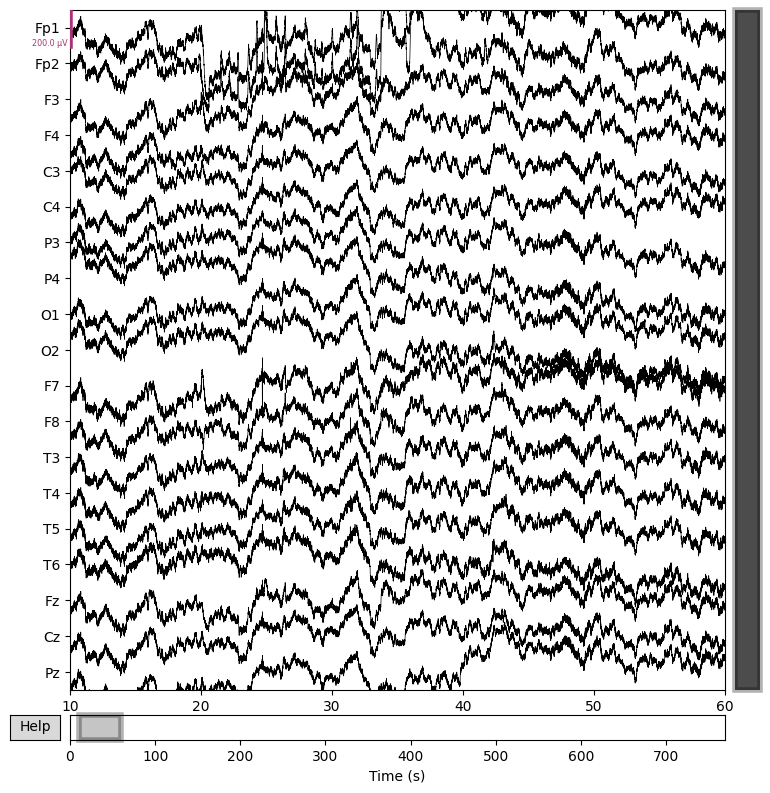

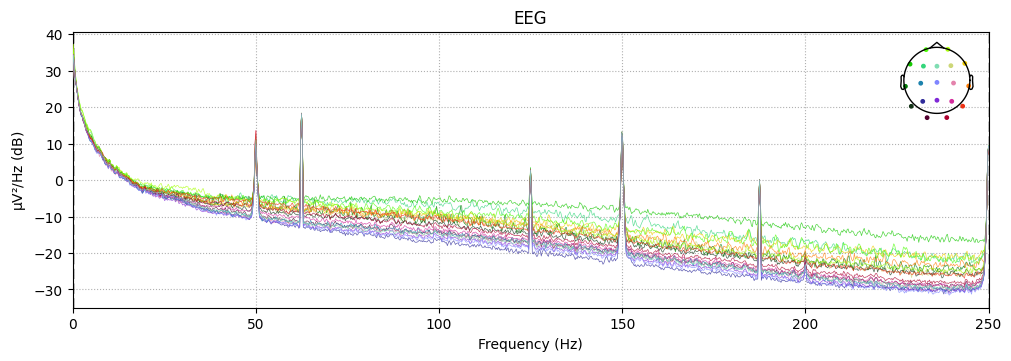

In [92]:
fig = raw.compute_psd().plot(show=False)
plt.show()

NOTE: plot_psd_topomap() is a legacy function. New code should use .compute_psd().plot_topomap().
Effective window size : 4.096 (s)


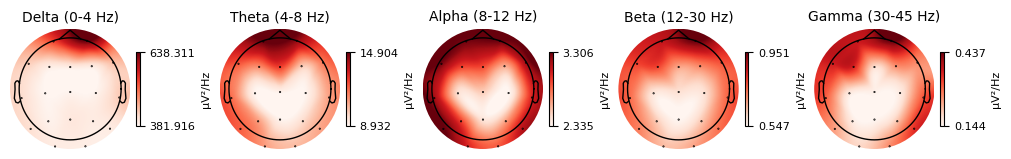

In [93]:
fig = raw.plot_psd_topomap(show=False)
plt.show()

#### Prep

In [94]:
prep = mne.io.read_raw_eeglab(os.path.join(prep_path, f"{subject_name}_task-eyesclosed_eeg.set"))

/var/folders/2r/ng5l8yc97950rj3w9g5mq9h00000gn/T/ipykernel_17474/716258834.py:1: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  prep = mne.io.read_raw_eeglab(os.path.join(prep_path, f"{subject_name}_task-eyesclosed_eeg.set"))
/var/folders/2r/ng5l8yc97950rj3w9g5mq9h00000gn/T/ipykernel_17474/716258834.py:1: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  prep = mne.io.read_raw_eeglab(os.path.join(prep_path, f"{subject_name}_task-eyesclosed_eeg.set"))


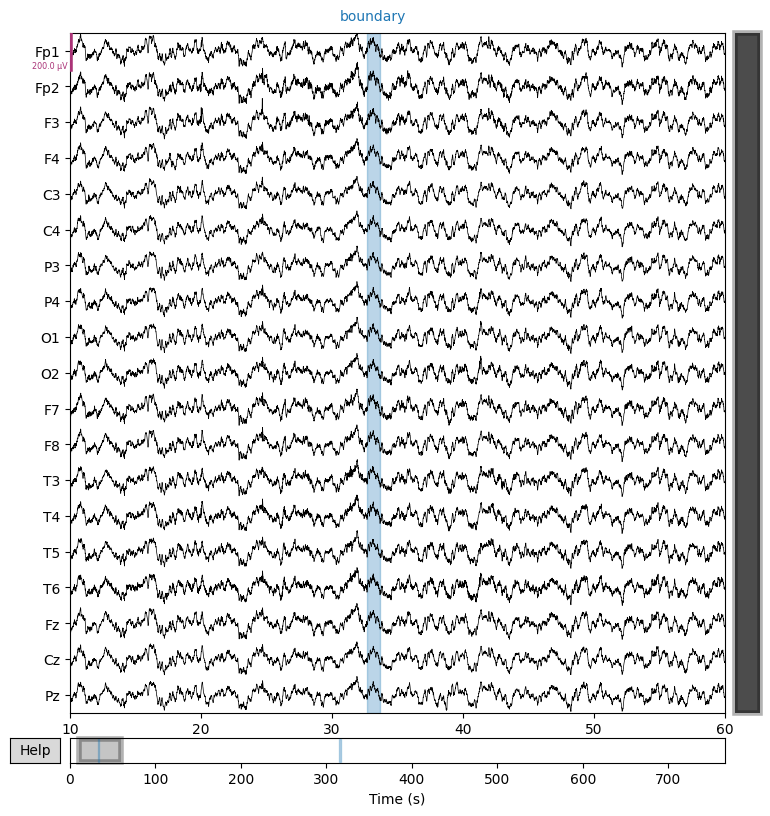

In [95]:
fig = prep.plot(scalings=dict(eeg=100e-6), start=10, duration=50, show=False)
plt.show()

Effective window size : 4.096 (s)


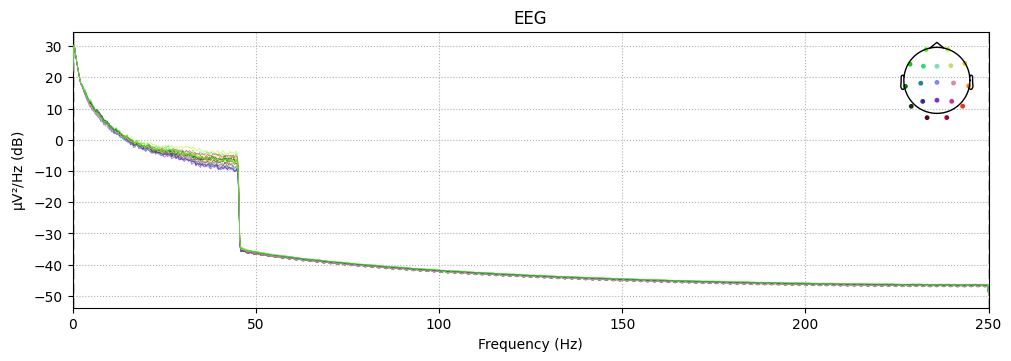

In [96]:
fig = prep.compute_psd().plot(show=False)
plt.show()

NOTE: plot_psd_topomap() is a legacy function. New code should use .compute_psd().plot_topomap().
Effective window size : 4.096 (s)


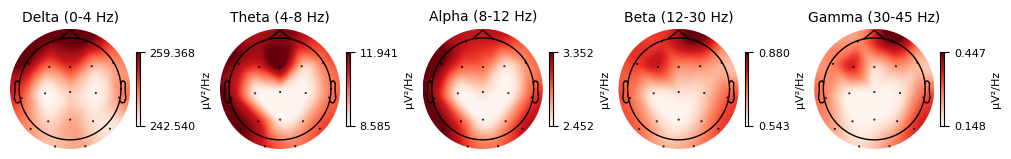

In [97]:
fig = prep.plot_psd_topomap(show=False)
plt.show()

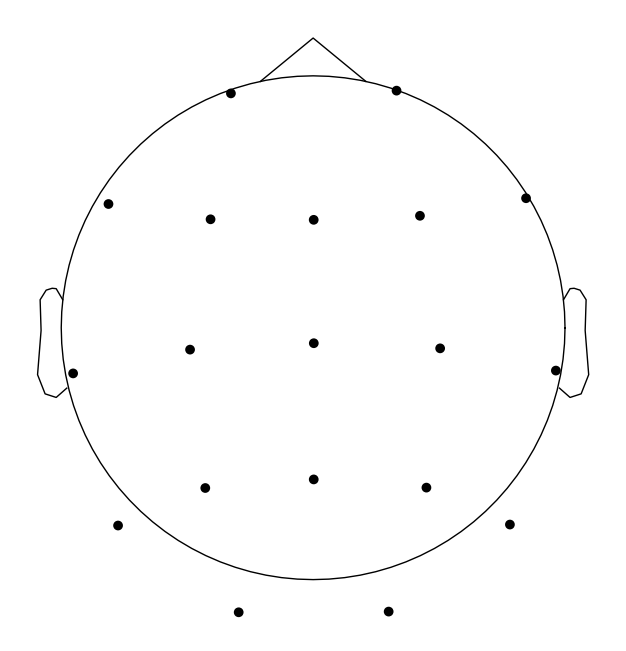

In [98]:
fig = prep.plot_sensors(show=False)
plt.show()

In [99]:
import joblib
from glob import glob
import scikitplot as skplt
import matplotlib.pyplot as plt

In [100]:
dirs = glob("/Applications/THESIS/08.12.23 RESULTS/PT clf*.joblib")


 ############ ANALYSE ###########

clf: GradientBoostingClassifier()
feature selection: False
feature selection model: LassoCV()
feature scaler: True
ts acc average on loso: 0.7840984901911859
ts acc: 0.7853138330286411 
ts f1: 0.7366768816802451 
ts sensitivity: 0.7037989145958298 
ts specificity: 0.7727771679473107



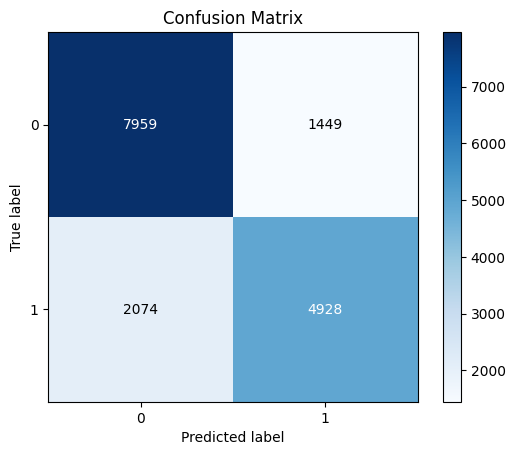

###############################


 ############ ANALYSE ###########

clf: RandomForestClassifier()
feature selection: False
feature selection model: LassoCV()
feature scaler: True
ts acc average on loso: 0.7805663715912599
ts acc: 0.7859232175502743 
ts f1: 0.7359242276178305 
ts sensitivity: 0.6990859754355898 
ts specificity: 0.7768608157435327



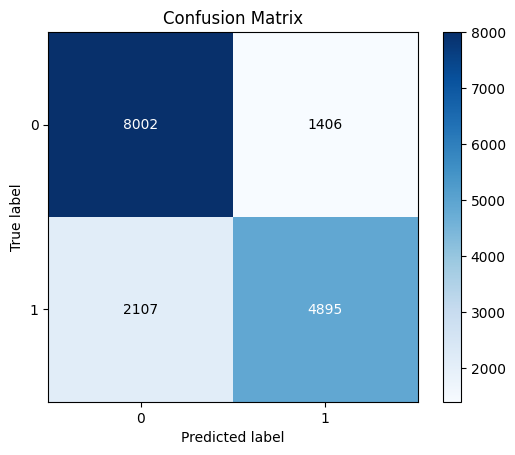

###############################


 ############ ANALYSE ###########

clf: KNeighborsClassifier(n_neighbors=3)
feature selection: False
feature selection model: LassoCV()
feature scaler: True
ts acc average on loso: 0.6917324035365617
ts acc: 0.694393662400975 
ts f1: 0.6440485485130243 
ts sensitivity: 0.647957726363896 
ts specificity: 0.6401862565260336



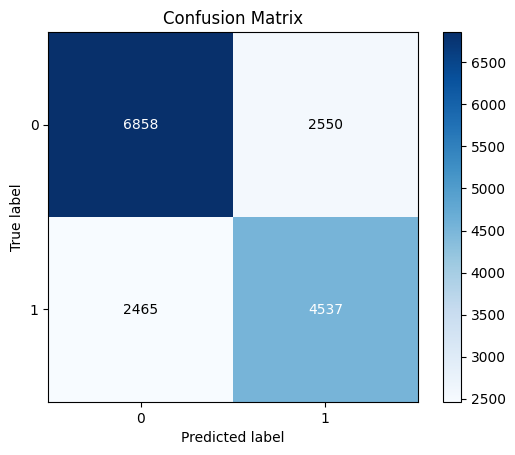

###############################


 ############ ANALYSE ###########

clf: LinearDiscriminantAnalysis()
feature selection: False
feature selection model: LassoCV()
feature scaler: True
ts acc average on loso: 0.7872914839816051
ts acc: 0.7858013406459476 
ts f1: 0.7080322285904144 
ts sensitivity: 0.6086832333618966 
ts specificity: 0.8461385745483423



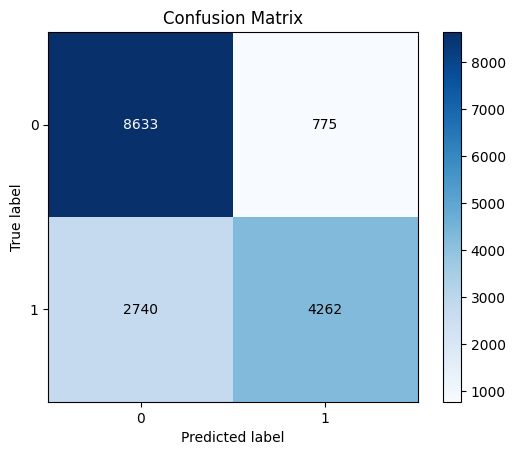

###############################


 ############ ANALYSE ###########

clf: SVC()
feature selection: False
feature selection model: LassoCV()
feature scaler: False
ts acc average on loso: 0.7843778236545051
ts acc: 0.78897014015844 
ts f1: 0.7130665340956169 
ts sensitivity: 0.6145387032276493 
ts specificity: 0.849220446023288



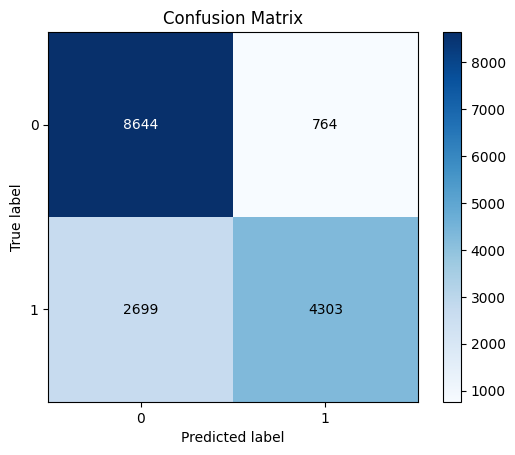

###############################


 ############ ANALYSE ###########

clf: LinearDiscriminantAnalysis()
feature selection: True
feature selection model: LassoCV()
feature scaler: True
ts acc average on loso: 0.7872461115497051
ts acc: 0.7857404021937843 
ts f1: 0.7081673306772909 
ts sensitivity: 0.609254498714653 
ts specificity: 0.845422116527943



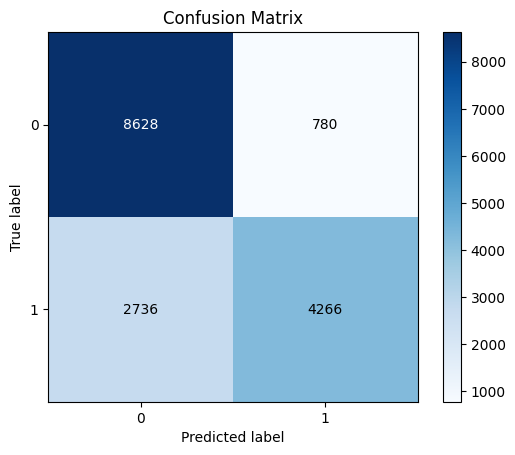

###############################


 ############ ANALYSE ###########

clf: GradientBoostingClassifier()
feature selection: True
feature selection model: LassoCV()
feature scaler: True
ts acc average on loso: 0.7826075232859436
ts acc: 0.7839731870810481 
ts f1: 0.7353094900321063 
ts sensitivity: 0.7032276492430735 
ts specificity: 0.7704584572054451



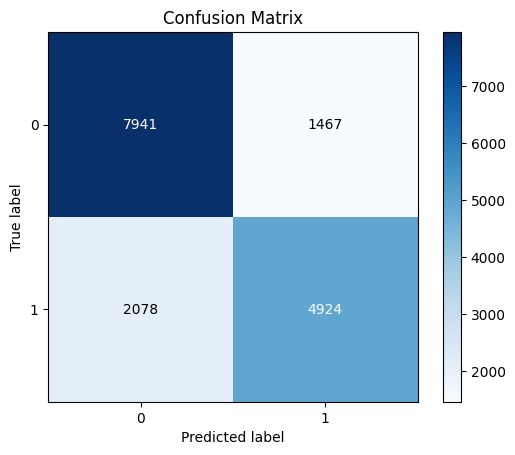

###############################



In [101]:
for d in dirs:
    rs = joblib.load(d)
    print("\n ############ ANALYSE ###########")
    print(rs["end_result"])
    skplt.metrics.plot_confusion_matrix(rs["ts_label"], rs["ts_predict"])
    plt.show()
    print("###############################\n")